# Machine Learning framework on Scikit-Learn

![](src/df.png)

## Data

In [1]:
import pandas as pd

df_gapminder = pd.read_csv('../../../data/raw/gapminder.csv').query('year == year.max()').drop(columns=['year','iso_num','iso_alpha']).set_index('country')
df_gapminder = pd.get_dummies(df_gapminder)
df_gapminder

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.828,31889923,974.580338,False,False,True,False,False
Albania,76.423,3600523,5937.029526,False,False,False,True,False
...,...,...,...,...,...,...,...,...
Zambia,42.384,11746035,1271.211593,True,False,False,False,False
Zimbabwe,43.487,12311143,469.709298,True,False,False,False,False


$$
Y = b_0 + b_1 \cdot X_1 + b_2 \cdot X_2 + ... 
$$
$$
lifeExp = b_0 + b_1 \cdot pop + b_2 \cdot gdpPercap + ... 
$$

## The Machine Learning System

- To create any ML model in Python, you always [follow the same system](https://datons.craft.me/h3f5pSQSE7l6RW).

## Select the variables for the model

1. **`y` target**: output variable (to predict)
2. **`X` explanatory**: input variables to calculate/explain the prediction

In [2]:
y = df_gapminder['lifeExp']
X = df_gapminder.drop(columns='lifeExp')
y

country
Afghanistan    43.828
Albania        76.423
                ...  
Zambia         42.384
Zimbabwe       43.487
Name: lifeExp, Length: 142, dtype: float64

In [3]:
X

,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,31889923,974.580338,False,False,True,False,False
Albania,3600523,5937.029526,False,False,False,True,False
...,...,...,...,...,...,...,...
Zambia,11746035,1271.211593,True,False,False,False,False
Zimbabwe,12311143,469.709298,True,False,False,False,False


## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression()

## Prediction

In [5]:
y_pred = model_lr.predict(X)

df_pred = pd.DataFrame({'lifeExp': y, 'pred_lr': y_pred})
df_pred

,lifeExp,pred_lr
country,,
Afghanistan,43.828,66.647871
Albania,76.423,70.982125
...,...,...
Zambia,42.384,54.167720
Zimbabwe,43.487,53.889409


## Model evaluation

In [6]:
model_lr.score(X, y)

0.7141199514291265

## The K Nearest Neighbours ML Model

### Fit the model with the data

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model_kn = KNeighborsRegressor()
model_kn.fit(X, y)

KNeighborsRegressor()

### Predictions

In [8]:
y_pred = model_kn.predict(X)

df_pred['pred_kn'] = y_pred
df_pred

,lifeExp,pred_lr,pred_kn
country,,,
Afghanistan,43.828,66.647871,63.8976
Albania,76.423,70.982125,68.8572
...,...,...,...
Zambia,42.384,54.167720,56.3346
Zimbabwe,43.487,53.889409,54.8012


### Model evaluation

#### Calculate the model's score

In [9]:
model_kn.score(X, y)

0.21327511911395203

## The Random Forest ML Model

### Fit the model with the data

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

### Predictions

In [11]:
y_pred = model.predict(X)

df_pred['pred_dt'] = y_pred
df_pred

,lifeExp,pred_lr,pred_kn,pred_dt
country,,,,
Afghanistan,43.828,66.647871,63.8976,43.828
Albania,76.423,70.982125,68.8572,76.423
...,...,...,...,...
Zambia,42.384,54.167720,56.3346,42.384
Zimbabwe,43.487,53.889409,54.8012,43.487


### Model evaluation

In [12]:
model.score(X, y)

1.0

## Bonus: plot tree

### Default

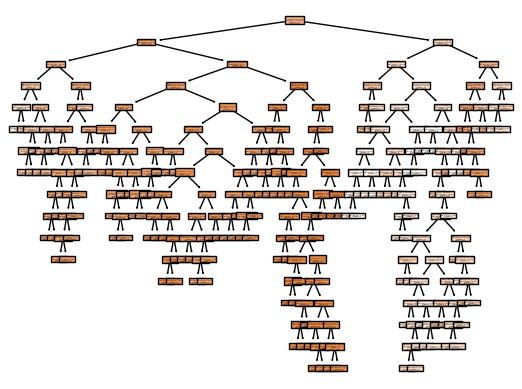

In [13]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=model.feature_names_in_, filled=True);

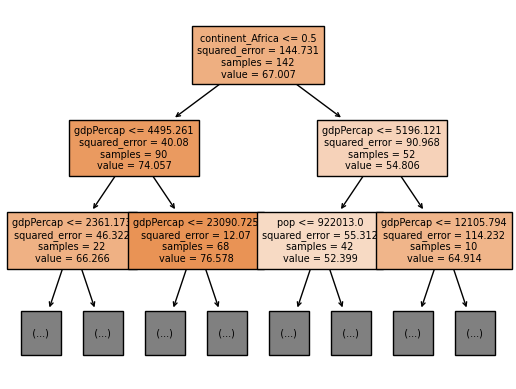

In [14]:
plot_tree(model, feature_names=model.feature_names_in_, filled=True, max_depth=2, fontsize=7);

### Cut tree

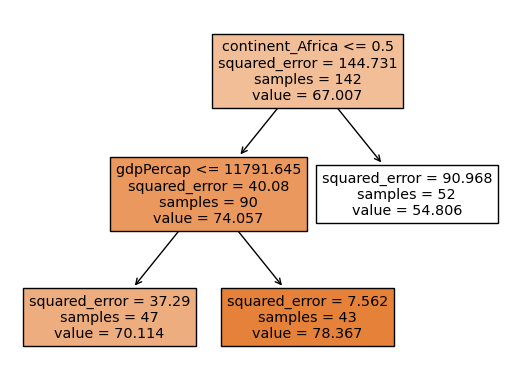

In [15]:
model = DecisionTreeRegressor(min_samples_leaf=40)
model.fit(X,y)
plot_tree(model, feature_names=model.feature_names_in_, filled=True);

In [16]:
df_pred['pred_dt_cut'] = model.predict(X)
df_pred

,lifeExp,pred_lr,pred_kn,pred_dt,pred_dt_cut
country,,,,,
Afghanistan,43.828,66.647871,63.8976,43.828,70.114064
Albania,76.423,70.982125,68.8572,76.423,70.114064
...,...,...,...,...,...
Zambia,42.384,54.167720,56.3346,42.384,54.806038
Zimbabwe,43.487,53.889409,54.8012,43.487,54.806038


In [17]:
model.score(X,y)

0.6687337633505184